In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px

In [ ]:
medical_df=pd.read_csv('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#min age is 18 max age is 64 so lets make a bar plot on it showing 47 bins
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig=px.histogram(medical_df,x='age',marginal='box',nbins=47)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [ ]:
fig=px.histogram(medical_df,x='bmi',marginal='box',color_discrete_sequence=['red'],title='Dist of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.charges.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [ ]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'],title='Annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='sex',color_discrete_sequence=['red','blue'],title='Annual medical charges accord SEX')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='region',color_discrete_sequence=['red','blue','green','yellow'],title='Annual medical charges accord REGION')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#getting the people who are smoker
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

In [ ]:
fig=px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.8,title='Age vs Charges(SMOKERS)')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig=px.scatter(medical_df,x='age',y='charges',color='bmi',opacity=0.8,title='Age vs Charges(BMI)')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig=px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,title='BMI vs Charges(SMOKERS)')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
#corelation
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
##correlation works on only numerical values so
medical_df.smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [ ]:
# You can see here that we have converted the yes no into 0 and 1
smoker_values={'yes':1,'no':0}
smoker_numeric=medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
#To get the correlation of all this will be ok for all the numeric value but doesn't for medical_df.corr because of smokers yes no
numerical_columns = ['age', 'bmi', 'children', 'charges']
medical_df[numerical_columns].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Materix')

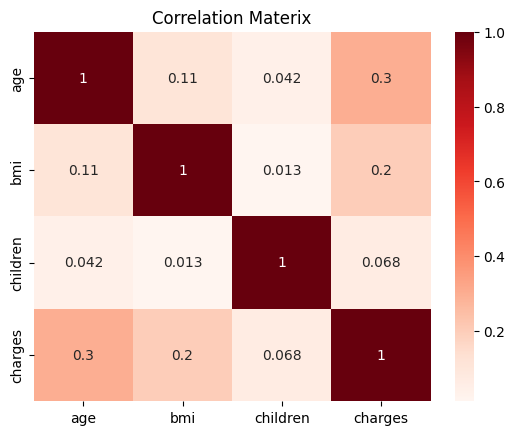

In [ ]:
sns.heatmap(medical_df[numerical_columns].corr(),cmap='Reds',annot=True)
plt.title('Correlation Materix')

###According to the data we know that smoker and charges have more correlation  

##Linear regression Using single feature lets to this for ages and charges

In [ ]:
non_smokers_df=medical_df[medical_df.smoker=='no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

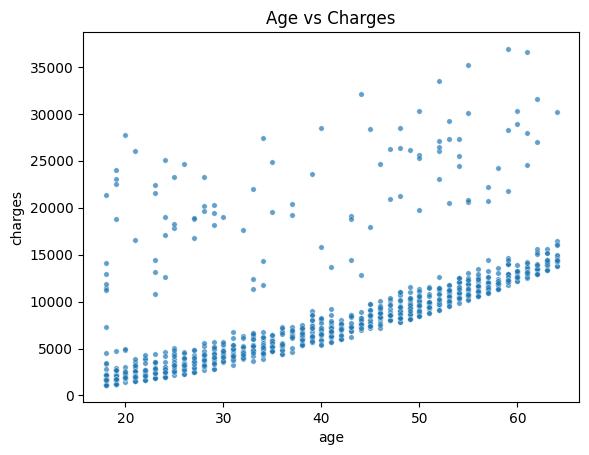

In [ ]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smokers_df,x='age',y='charges',alpha=0.7,s=15)

###Here we are taking age of non-smokers and trying to build a simple linear model which takes the non-smokers age data has imput and determine or predict the output and the charges are called targets


In [ ]:
#y=wx+b is the simple model in here y=charges and x=ages so the formula will be charges=w(ages)+b
def estimates_charges(age,w,b):
  return w*age+b

#this function is are everyfirst model

In [ ]:
ages=non_smokers_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
w=50
b=100

In [ ]:
est_charge=estimates_charges(ages,w,b)
est_charge
#after loading this yu can see the predicted value which are model gave is pretty low compared to the main one so lets check it

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
non_smokers_df.charges
#after running this you can see there is more difference between the estimated values which our model predicted and the thing in here

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


Text(0, 0.5, 'Estimated Charges')

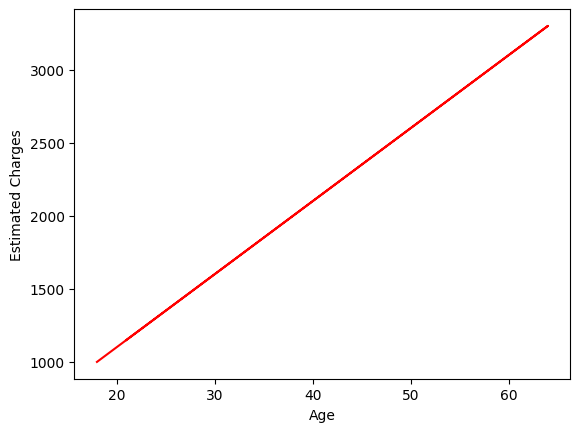

In [ ]:
#lets plot and see how it looks like
plt.plot(ages,est_charge,color='red')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

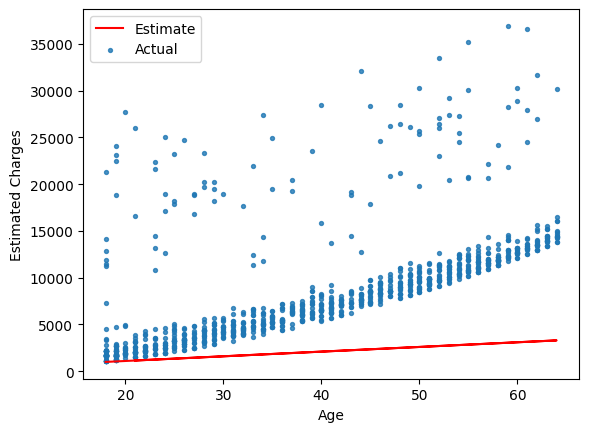

In [ ]:
#now lets plot it in the main data and see whether its a bestfit line or not. By doing this you can even find how good our model is
target=non_smokers_df.charges
plt.plot(ages,est_charge,color='red')
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.legend(['Estimate','Actual'])
plt.show()
#after running this you can see the best fit line going completely wrong, our estimation is very poor

In [ ]:
#so here lets create a function that helps us to create different values for w and b to move around. This function will help you move the line around to find the best fit
def try_parameter(w,b):
  ages=non_smokers_df.age
  target=non_smokers_df.charges
  est_mate=estimates_charges(ages,w,b)
  plt.plot(ages,est_mate,color='red')
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Estimated Charges')
  plt.legend(['Estimate','Actual'])
  plt.show()

# this function basically helps you to input w and b and then check how the line is changing

In [ ]:
non_smokers_df.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


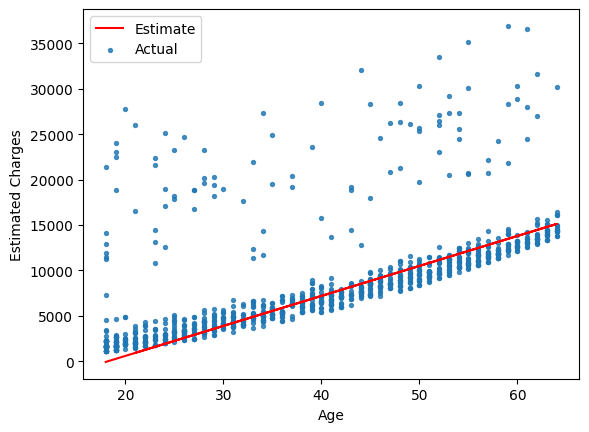

In [ ]:
try_parameter(330,-6000)
#w make the line to go slope and b moves the line up and down

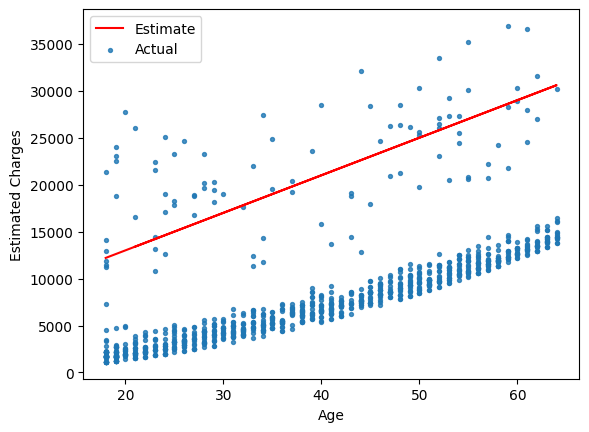

In [ ]:
try_parameter(400,5000)

In [ ]:
#like this we humans can see and visually and have the best fit line in play but this would be different so we need to make it automated where computer it self gives you the best fit line and then measure
#We can say that or measure this by acutally seeing the cost function or loss function this usally caluculates the error we get that also get us into an important thing.
#Actual value -predicted value this is the residual error
#for removing negative value we square them
#we are going to use root mean square error

def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

#This tells you or caluculates the distance or tells how bad our model is

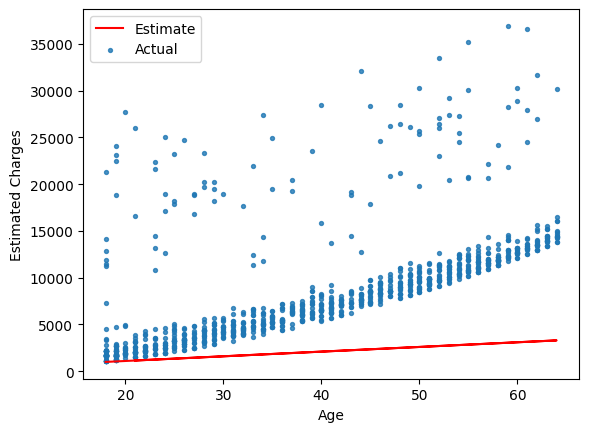

In [ ]:
#Sample
w=50
b=100
try_parameter(w,b)

In [ ]:
targets=non_smokers_df['charges']
predicted=estimates_charges(non_smokers_df.age,w,b)

In [ ]:
rmse(targets,predicted)
#we got 8400 change this is so much of an error

8461.949562575493

###This above value also shows how bad the model is at predicting the values the lower the loss the better the model


In [ ]:
def try_parameter(w,b):
  ages=non_smokers_df.age
  target=non_smokers_df.charges
  predictions=estimates_charges(ages,w,b)

  plt.plot(ages,predictions,color='red')
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('charges')
  plt.legend(['predicted','Actually'])

  loss=rmse(target,predictions)
  print("RMSE: ", loss)
  print()

RMSE:  8461.949562575493



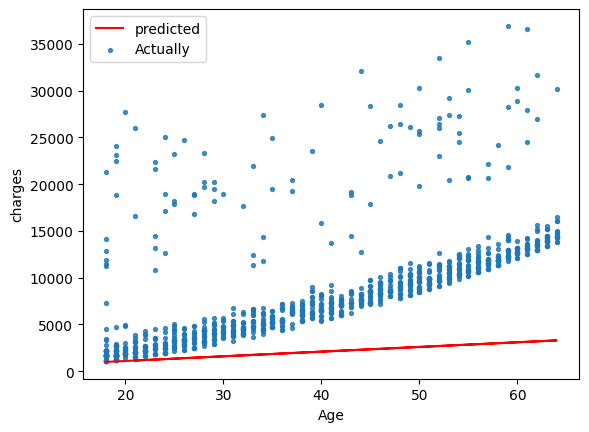

In [ ]:
try_parameter(50,100)

RMSE:  4848.603261950663



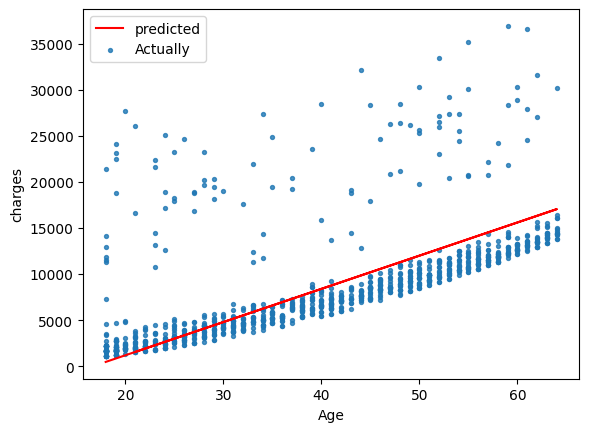

In [ ]:
#Lets try to find out the lowest error that can be achieved
try_parameter(360,-6000)

In [ ]:
#until now we made our own functions inorder to fit the lines and etc now we are going to use scikit learn that will help you in having the best fit line and give the output
from sklearn.linear_model import LinearRegression

In [ ]:
#now lets create a model object
model=LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
#model.fit requires two dimensions matrix so lets take another one

inputs=non_smokers_df[['age']]
targets=non_smokers_df.charges
print('inputs: ',inputs.shape)
print('target: ',targets.shape)

inputs:  (1064, 1)
target:  (1064,)


In [ ]:
model.fit(inputs,targets)
#this piece of code gave you you the best fit line

LinearRegression()

In [ ]:
predicted=model.predict(inputs)
predicted
#you can see the predicted values in accordingly in the

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
targets
# The best fit line is pretty good because of the charges seen you can see that the range is around 1000 this is acceptable

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
#here we are predicting our the values from the model we build
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
rmse(targets,predicted)
##this is lower value then before we can see that by seeing this we can say that this is the best fit line
#this is pretty much better taking all the outliers into consideration

4662.505766636395

In [ ]:
#w this is the w value
model.coef_

array([267.24891283])

In [ ]:
#b this is the b value
model.intercept_

-2091.4205565650864

RMSE:  4662.505766636395



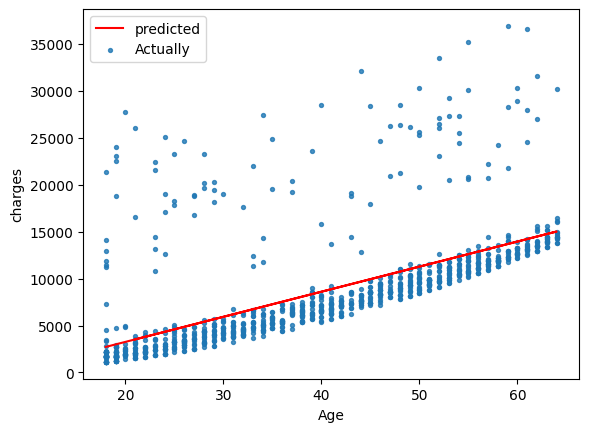

In [ ]:
#lets just try to plot them once and see how this looks
try_parameter(model.coef_,model.intercept_)

In [ ]:
#Doing the same thing using SGD regression
from sklearn.linear_model import SGDRegressor

In [ ]:
model_SGD=SGDRegressor()

In [ ]:
input=non_smokers_df[['age']]
target=non_smokers_df.charges
model_SGD.fit(input,target)

SGDRegressor()

In [ ]:
model_SGD.predict(input)

array([3577.68570322, 5891.27936995, 7048.07620331, ..., 3577.68570322,
       3577.68570322, 4271.76380324])

In [ ]:
rmse(target,model_SGD.predict(input))
#this thing is giveing more rmse error because this actually used for a larger dataset

4690.682131434416

In [ ]:
model_SGD.coef_

array([231.35936667])

In [ ]:
model_SGD.intercept_

array([-586.78289688])

RMSE:  4690.682131434416



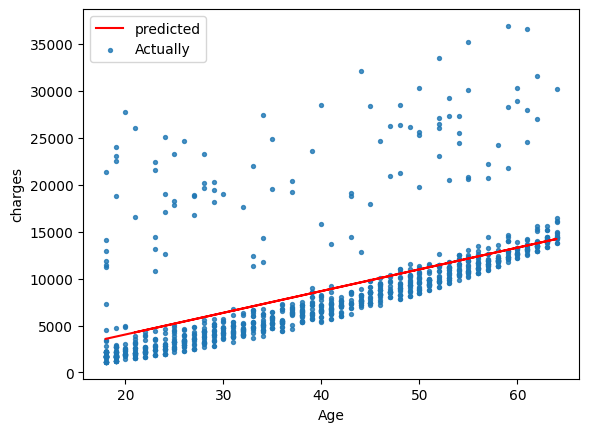

In [ ]:
try_parameter(model_SGD.coef_,model_SGD.intercept_)
#by looking into this we can say that this is not in the correct way

#Linear regression model for Smoker

In [ ]:
smoker=medical_df[medical_df.smoker=='yes']
smokers_age=smoker.age
Charges_smokers=smoker.charges


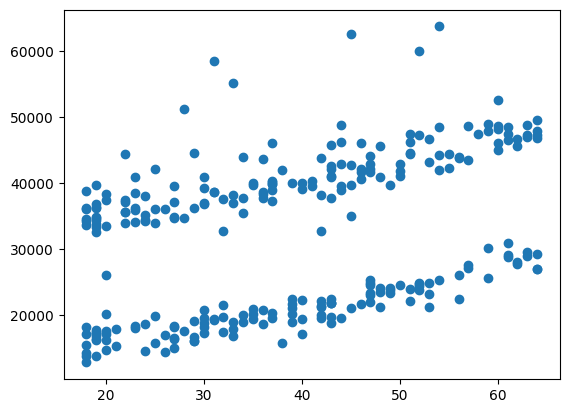

In [ ]:
plt.scatter(smokers_age,Charges_smokers)

In [ ]:
smest=estimates_charges(smokers_age,50,100)

Text(0, 0.5, 'Charges')

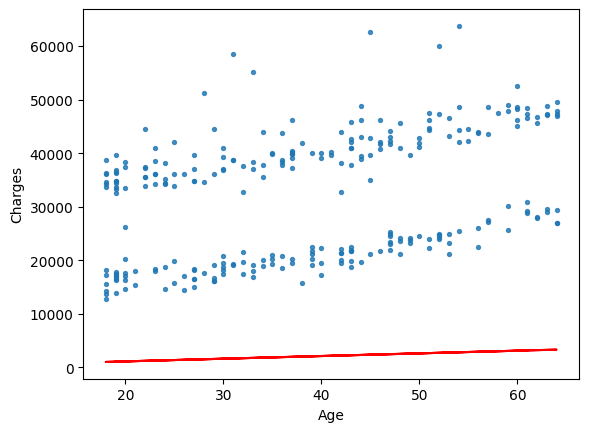

In [ ]:
plt.plot(smokers_age,smest,color='red')
plt.scatter(smokers_age,Charges_smokers,s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')

In [ ]:
model_smoker=LinearRegression()

In [ ]:
input=smoker[['age']]
target=smoker.charges
model_smoker.fit(input,target)

LinearRegression()

In [ ]:
model_smoker.predict(input)

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [ ]:
w=model_smoker.coef_
b=model_smoker.intercept_

In [ ]:
def try_parameter(w,b):
  ages=smoker.age
  target=smoker.charges
  predictions=estimates_charges(ages,w,b)

  plt.plot(ages,predictions,color='red')
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('charges')
  plt.legend(['predicted','Actually'])

  loss=rmse(target,predictions)
  print("RMSE: ", loss)
  print()

RMSE:  10711.00334810241



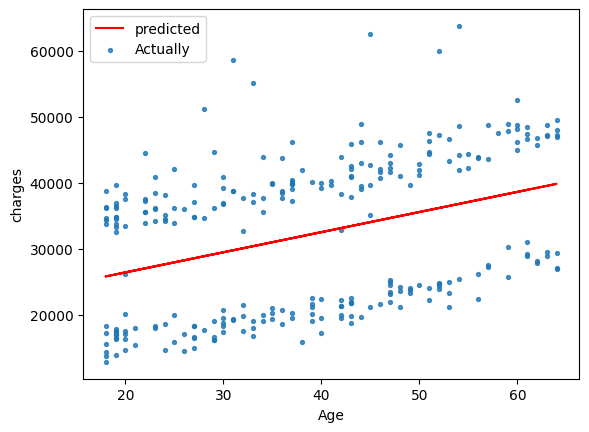

In [ ]:
try_parameter(w,b)
#You can see here that i have created the best fit line here for this model looking at the graph this is pretty clear that the model is great having the line in the middle

##Untill now we have create a model using single feature that was age

##Now we are going to create a model that will be using multiple Features

charges=w1*age+w2*BMI+b

In [ ]:
non_smokers_df=medical_df[medical_df.smoker=='no']
inputs=non_smokers_df[['age','bmi']]
target=non_smokers_df.charges

In [ ]:
model_Multi=LinearRegression().fit(inputs,target)

In [ ]:
predicted=model_Multi.predict(inputs)
predicted

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

In [ ]:
loss=rmse(target,predicted)
print('Loss:', loss)
##Here even after including BMI the loss is somewhat same

Loss: 4662.3128354612945


In [ ]:
def estimatess_charges(age, bmi, w, b):
  """Estimates charges using age, bmi, weights, and bias."""
  return w[0] * age + w[1] * bmi + b

def try_parameter(w, b):
  """
  Plots actual vs. predicted charges, calculates and prints RMSE.

  Args:
    w: List or array containing weights for age and bmi.
    b: Bias term.
  """
  ages = non_smokers_df.age
  bmis = non_smokers_df.bmi  # Get bmi values
  target = non_smokers_df.charges

  predictions = estimatess_charges(ages, bmis, w, b)  # Use both age and bmi

  plt.scatter(ages, target, s=8, alpha=0.8, c=bmis, cmap='viridis')  # Color by bmi
  plt.plot(ages, predictions, color='red')

  plt.xlabel('Age')
  plt.ylabel('charges')
  plt.legend(['predicted', 'Actually'])
  plt.colorbar(label='BMI')  # Add colorbar for bmi

  loss = rmse(target, predictions)
  print("RMSE: ", loss)
  print()

RMSE:  4662.3128354612945



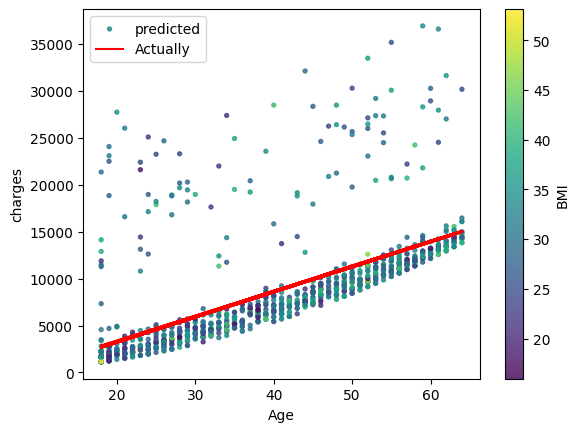

In [ ]:
try_parameter(model_Multi.coef_,model_Multi.intercept_)

In [ ]:
non_smokers_df.charges.corr(non_smokers_df.bmi)

0.0840365431283327

In [ ]:
fig=px.scatter(non_smokers_df,x='bmi',y='charges',title="BMI vs Charges")
fig.update_traces(marker_size=5)
fig.show()
#According to the data shown we can say that there is no relation between the bmi and charges to be in exact

##Lets go make a single model that will check the bmi can really improve the charges or not


In [ ]:
##Mostly this will not be a better model then the previous one
input=non_smokers_df[['bmi']]
target=non_smokers_df.charges
model_bmi=LinearRegression().fit(input,target)

In [ ]:
predicted = model_bmi.predict(input)
predicted

array([8694.17241411, 8629.99248471, 7771.89849358, ..., 8539.97388244,
       8950.89213171, 8029.86846955])

In [ ]:
def try_parameter(w,b):
  Bmi=non_smokers_df.bmi
  target=non_smokers_df.charges
  predictions=estimates_charges(Bmi,w,b)

  plt.plot(Bmi,predictions,color='red')
  plt.scatter(Bmi,target,s=8,alpha=0.8)
  plt.xlabel('Bmi')
  plt.ylabel('charges')
  plt.legend(['predicted','Actually'])

  loss=rmse(target,predictions)
  print("RMSE: ", loss)
  print()

RMSE:  5969.772531913293



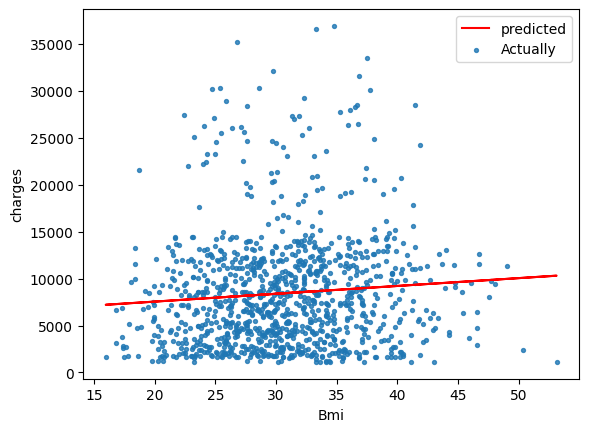

In [ ]:
try_parameter(model_bmi.coef_,model_bmi.intercept_)
##Here you can see even the RMSE is also high

##Now lets add children in this and build a model

In [ ]:
input=non_smokers_df[['age','bmi','children']]
target=non_smokers_df.charges
model_ABC=LinearRegression()

In [ ]:
model_ABC.fit(input,target)

LinearRegression()

In [ ]:
predicted=model_ABC.predict(input)
predicted

array([2724.94209163, 6535.13457204, 6065.27173951, ..., 2134.51524931,
       2160.54349555, 2898.08585583])

In [ ]:
loss=rmse(target,predicted)
print('Loss:', loss)

Loss: 4608.470405038247


##Now lets move to a categorical data where yes and no thing how we can build a model on top it

<Axes: xlabel='smoker', ylabel='charges'>

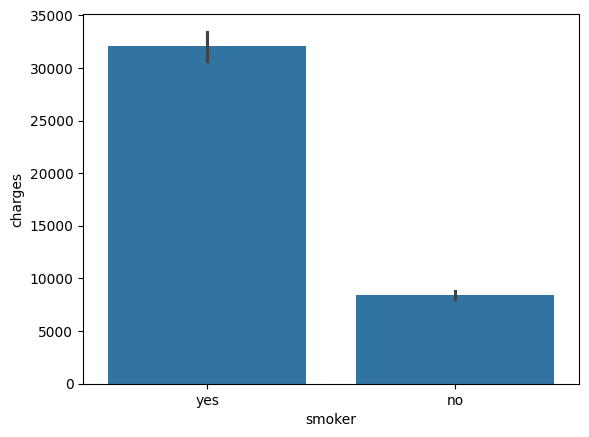

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [ ]:
smoker_code={'yes':1,'no':0}
medical_df['smoker_code']=medical_df.smoker.map(smoker_code)
#this code maps and changes and creates a new column that will give 0's and 1's in place of yes and no

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)
##This code will run without any issue because this code is comparing a new column where the code has changed its thing into 1's and 0's

0.787251430498478

In [ ]:
##Now lets create and see a model including this smoker_code in our model
input=medical_df[['age','bmi','children','smoker_code']]
target=medical_df.charges
model_smoker_code=LinearRegression()
model_smoker_code.fit(input,target)

LinearRegression()

In [ ]:
model_smoker_code.predict(input)

array([25587.42524891,  3880.94594512,  7158.62006921, ...,
        4398.7459491 ,  1615.83647369, 36793.67069541])

In [ ]:
rmse(target,model_smoker_code.predict(input))
##we can see that there is a huge difference we went down around 11K to 6K

6056.439217188081

<Axes: xlabel='sex', ylabel='charges'>

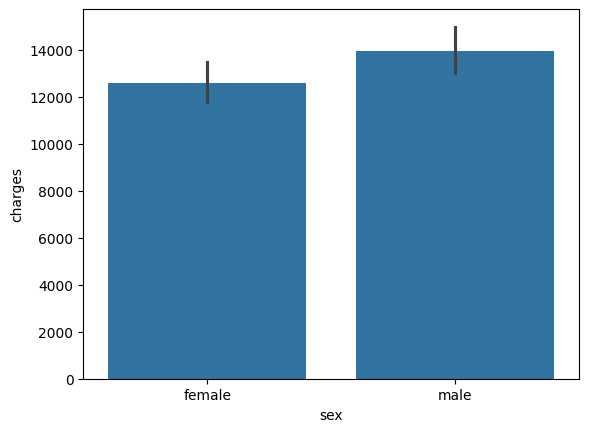

In [ ]:
#now lets try making this model a bit better like lets add sex to your model
sns.barplot(data=medical_df, x='sex', y='charges')

In [ ]:
sex_codes={'male':1,'female':0}
medical_df['sex_code']=medical_df.sex.map(sex_codes)

In [ ]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [ ]:
input = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']]
target=medical_df.charges
model_sex_code=LinearRegression()

In [ ]:
model_sex_code.fit(input,target)

LinearRegression()

In [ ]:
rmse(target,model_sex_code.predict(input))

6056.100708754546

In [ ]:
model_sex_code.predict(input)

array([25661.85689486,  3818.77858262,  7096.73025538, ...,
        4465.88909619,  1676.96948913, 36863.89250792])

In [ ]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


<Axes: xlabel='region', ylabel='charges'>

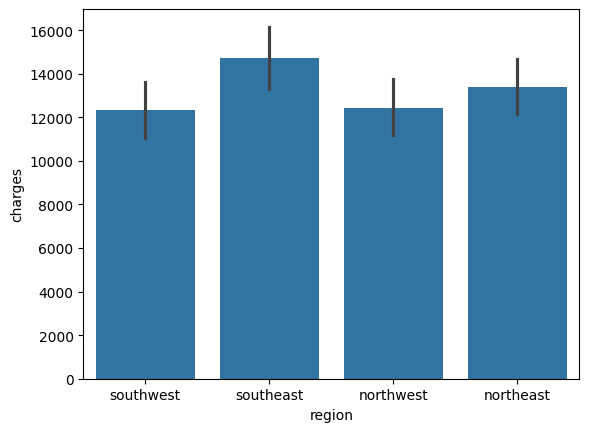

In [ ]:
#Now you can see that we can change yes or no , male female into 0s and 1s now lets see how this thing can be done to regions one
sns.barplot(data=medical_df,x='region',y='charges')

In [ ]:
#there are four regions i think in this data i will show you how things will be done here
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()

In [ ]:
medical_df.region

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [ ]:
enc.fit(medical_df[['region']])

OneHotEncoder()

In [ ]:
enc.categories

'auto'

In [ ]:
#this thing transforms the region names into a code that a code can remember
enc.transform(medical_df[['region']]).toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
# we will store this thing into one_hot actucally this type  of encoding is called oneHotEncoding
one_hot=enc.transform(medical_df[['region']]).toarray()

In [ ]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
#now lets add even this region thing into our medical_df
input=medical_df[['age','sex_code','bmi','children','smoker_code','northeast','northwest','southeast','southwest']]
target=medical_df.charges

In [ ]:
##here again the rest all is same
model_region=LinearRegression()

In [ ]:
model_region.fit(input,target)

LinearRegression()

In [ ]:
rmse(target,model_region.predict(input))

6041.6796511744515

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


##Some times creating two linear regression models can give a good impact that is now we are going to make a two models which contains everything excluding the smokers thing

In [ ]:
smokers_df=medical_df[medical_df.smoker=='yes']
non_smokers_df=medical_df[medical_df.smoker=='no']

In [ ]:
inputSm=smokers_df[['age','bmi','children','sex_code','northeast','northwest','southeast','southwest']]
targetSm=smokers_df.charges

In [ ]:
inputNOSM=non_smokers_df[['age','bmi','children','sex_code','northeast','northwest','southeast','southwest']]
targetNOSM=non_smokers_df.charges

In [ ]:
model_smokers=LinearRegression()

In [ ]:
model_nonSmokers=LinearRegression()


In [ ]:
model_smokers.fit(inputSm,targetSm)

LinearRegression()

In [ ]:
model_nonSmokers.fit(inputNOSM,targetNOSM)

LinearRegression()

In [ ]:
model_nonSmokers.predict(inputNOSM)

array([2264.01132619, 6069.12726666, 5877.67545787, ..., 3159.45809157,
       2260.98337791, 2442.18705738])

In [ ]:
targetNOSM

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
model_smokers.predict(inputSm)

array([23140.75355179, 30806.65871977, 44432.02632867, 36613.11781244,
       33702.13286862, 38721.54092967, 34916.54641141, 37884.14578333,
       40590.25734779, 51422.75929701, 36795.87114087, 30837.65021784,
       35476.96445533, 46654.10726179, 26971.40812205, 23551.14519646,
       15068.33340255, 18466.48718554, 19175.16493119, 36623.03015756,
       38500.77045113, 22431.67868538, 37858.56449829, 37280.70361097,
       40556.27917547, 21351.88997791, 15143.62282539, 36443.69462151,
       23133.38155955, 43670.74299969, 24599.70081338, 35146.99407341,
       23730.97180371, 11773.99423191, 21835.8971838 , 27154.13636703,
       34095.9664088 , 23042.71627311, 23915.60533586, 18900.24921628,
       35495.63833064, 27119.01063262, 34622.62757572, 49366.89371886,
       48932.86075099, 35893.09691699, 27596.37142414, 32933.89674881,
       22635.79905693, 19283.76461015, 24225.18580588, 37952.26291211,
       35106.34278659,  7631.04502637, 41616.86585605, 40331.0964704 ,
      

In [ ]:
targetSm

,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
...,...
1313,36397.57600
1314,18765.87545
1321,28101.33305
1323,43896.37630


##We can see the loss between this models i think based on all the other consideration this two models separately can give you something best out of smokers and non smokers

In [ ]:
rmse(targetSm,model_smokers.predict(inputSm))

5668.4678821121515

In [ ]:
rmse(targetNOSM,model_nonSmokers.predict(inputNOSM))

4573.074988795492

In [ ]:
#this thing explains you how the weight is applied to each and every category give to your model
model_nonSmokers.coef_

array([ 264.48143811,   18.98046182,  587.45825749, -525.97048681,
        733.68301887,  185.554256  , -258.36537156, -660.87190331])

In [ ]:
model_smokers.coef_

array([  267.40438625,  1475.54562981,   182.73655059,  -388.1216487 ,
         754.5850207 ,    64.86699592, -1138.15349664,   318.70148002])

In [ ]:
#we can create a dataframe and see how you model is giving the weights to each sections
weights_df=pd.DataFrame({
    'features': np.append(inputNOSM.columns,1),
    'weights': np.append(model_nonSmokers.coef_,model_nonSmokers.intercept_)
})

In [ ]:
#you can see the weights of this nonSmokers give by the model
weights_df

,features,weights
0,age,264.481438
1,bmi,18.980462
2,children,587.458257
3,sex_code,-525.970487
4,northeast,733.683019
5,northwest,185.554256
6,southeast,-258.365372
7,southwest,-660.871903
8,1,-2940.747155


##Because different column has different ranges there are two issues:-

###1.We can't compare the weights of different cols to identify which feature are important

###2.A column with a large range of inputs may effect the losses and dominate the optimization process

###For this type of issue we normally scale(or standartize) the values in numeric col by subtracting the mean and dividing by standard deviation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_cols=['age','bmi','children']
scaler=StandardScaler()

In [ ]:
scaler.fit(medical_df[numerical_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
#now we can the difference in each col now lets scale
medical_df[numerical_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
#lets transform this thing
scaler_input=scaler.transform(medical_df[numerical_cols])
scaler_input

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols=['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data=medical_df[cat_cols].values

In [ ]:
inputs=np.concatenate((scaler_input,categorical_data),axis=1)

In [ ]:
inputs[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

##Now that we have scaled it lets train it and see how things work

In [ ]:
#we have already specified the inputs
targets=medical_df.charges

In [ ]:
model=LinearRegression()
model.fit(input,target)

LinearRegression()

In [ ]:
predict=model.predict(input)
predict

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [ ]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
rmse(target,predict)

6041.6796511744515

###this actually doesnt change the loss i mean scaling doesnt change the loses but the weight given by the model will make more sense

In [ ]:

all_features = np.concatenate([numerical_cols, cat_cols])
weights_df = pd.DataFrame({
    'features': np.append(all_features, 'intercept'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,features,weight
4,sex_code,23848.534542
5,northeast,587.009235
3,smoker_code,475.500545
2,children,339.193454
0,age,256.856353
6,northwest,234.045336
1,bmi,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814
9,intercept,-12525.547811
